## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drop_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drop_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drop_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
#hyperparameter
lr_r=5e-3
epochs=50
batch_size=256
momentum=0.95
drop_rate=0.25

In [11]:
results = {}

model=build_mlp(x_train.shape[1:],drop_ratio=drop_rate)
model.summary()
optimizer=keras.optimizers.SGD(lr_r,nesterov=True,momentum=momentum)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)

model.fit(x_train,y_train,
         epochs=epochs,
         batch_size=batch_size,
         validation_data=(x_test,y_test),
         shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0   

Epoch 46/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.2515 - accuracy: 0.5517 - val_loss: 1.2965 - val_accuracy: 0.5380
Epoch 47/50
50000/50000 [==============================] - 12s 230us/step - loss: 1.2472 - accuracy: 0.5529 - val_loss: 1.2889 - val_accuracy: 0.5404
Epoch 48/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.2422 - accuracy: 0.5556 - val_loss: 1.2899 - val_accuracy: 0.5395
Epoch 49/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.2276 - accuracy: 0.5578 - val_loss: 1.2864 - val_accuracy: 0.5413
Epoch 50/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.2301 - accuracy: 0.5586 - val_loss: 1.2916 - val_accuracy: 0.5400


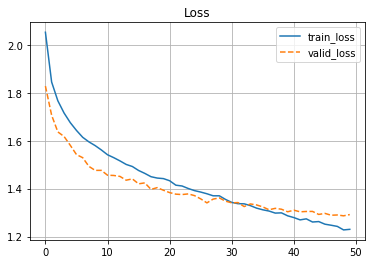

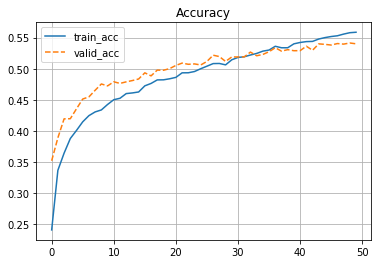

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(epochs),train_loss,'-',label='train_loss')
plt.plot(range(epochs),valid_loss,'--',label='valid_loss')
plt.legend()
plt.title('Loss')
plt.grid()
plt.show()

plt.plot(range(epochs),train_acc,'-',label='train_acc')
plt.plot(range(epochs),valid_acc,'--',label='valid_acc')
plt.legend()
plt.title('Accuracy')
plt.grid()
plt.show()